<a href="https://colab.research.google.com/github/GabArg/ProyectoAluraLatam2/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
import pandas as pd

# URLs de las bases de datos
urls = {
    "Tienda 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "Tienda 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "Tienda 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "Tienda 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv",
}

# Cargar los datos en un diccionario de DataFrames
tiendas = {nombre: pd.read_csv(url) for nombre, url in urls.items()}

# Mostrar la estructura de los datos
for nombre, df in tiendas.items():
    print(f"\n--- {nombre} ---")
    print("Columnas:", df.columns.tolist())
    print("Primeras filas:")
    print(df.head())



--- Tienda 1 ---
Columnas: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']
Primeras filas:
            Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      16/01/2021      Pedro Gomez          Bogotá             4   
1      18/05/2022  Beatriz Morales        Medellín             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali        

#1. Análisis de facturación



In [20]:
import pandas as pd

# URLs de las bases de datos
urls = {
    "tienda_1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "tienda_2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "tienda_3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "tienda_4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
}

# Cargar los datos
tiendas = {nombre: pd.read_csv(url) for nombre, url in urls.items()}

# Analizar la facturación de cada tienda en 2023
for nombre, df in tiendas.items():
    # Normalizar nombres de columnas (convertir a minúsculas y quitar espacios)
    df.columns = df.columns.str.strip().str.lower()

    if 'fecha de compra' in df.columns:  # Verificar si la columna 'fecha de compra' existe
        # Convertir la fecha a formato datetime especificando dayfirst=True
        df['fecha de compra'] = pd.to_datetime(df['fecha de compra'], dayfirst=True, errors='coerce')

        # Filtrar los registros de 2023
        registros_2023 = df[df['fecha de compra'].dt.year == 2023].copy()  # Crear una copia explícita

        # Verificar si existe la columna 'precio' para la facturación
        if 'precio' in df.columns:
            # Usar .loc para evitar SettingWithCopyWarning
            registros_2023['facturacion'] = registros_2023['precio'] * registros_2023['cantidad de cuotas']
            facturacion_2023 = registros_2023['facturacion'].sum()  # Sumar todas las facturaciones de 2023
            print(f"--- {nombre.upper()} (2023) ---")
            print(f"Facturación total en 2023: ${facturacion_2023:,.2f}\n")
        else:
            print(f"--- {nombre.upper()} ---")
            print("No se encontró la columna 'precio' para calcular la facturación.\n")
    else:
        print(f"--- {nombre.upper()} ---")
        print("No se encontró la columna 'fecha de compra' para filtrar los registros.\n")







--- TIENDA_1 (2023) ---
Facturación total en 2023: $321,026,900.00

--- TIENDA_2 (2023) ---
Facturación total en 2023: $247,758,900.00

--- TIENDA_3 (2023) ---
Facturación total en 2023: $209,707,100.00

--- TIENDA_4 (2023) ---
Facturación total en 2023: $149,522,200.00



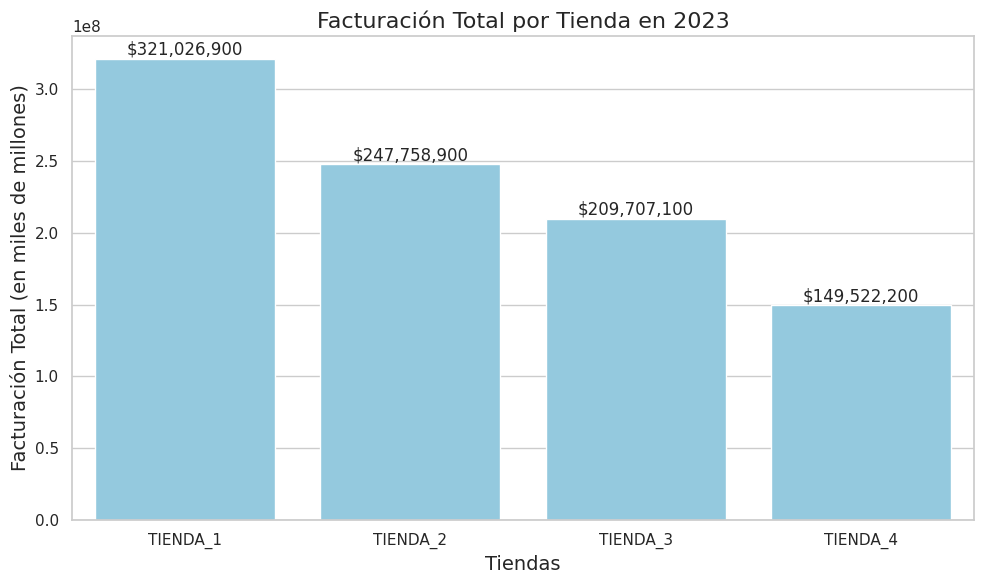

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Datos de facturación
tiendas = ['TIENDA_1', 'TIENDA_2', 'TIENDA_3', 'TIENDA_4']
facturacion = [321026900, 247758900, 209707100, 149522200]

# Configurar el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=tiendas, y=facturacion, color="skyblue")  # Usar color en lugar de palette

# Agregar etiquetas y título
plt.title('Facturación Total por Tienda en 2023', fontsize=16)
plt.xlabel('Tiendas', fontsize=14)
plt.ylabel('Facturación Total (en miles de millones)', fontsize=14)

# Mostrar valores encima de las barras
for i, valor in enumerate(facturacion):
    plt.text(i, valor, f"${valor:,}", ha='center', va='bottom', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


# 2. Ventas por categoría

In [10]:
import pandas as pd

# URLs de las bases de datos
urls = {
    "tienda_1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "tienda_2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "tienda_3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "tienda_4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
}

# Cargar los datos
tiendas = {nombre: pd.read_csv(url) for nombre, url in urls.items()}

# Analizar las ventas por categoría de cada tienda en 2023
for nombre, df in tiendas.items():
    # Normalizar nombres de columnas (eliminar espacios al principio y al final)
    df.columns = df.columns.str.strip()  # Eliminar espacios extra en los nombres de las columnas

    if 'Fecha de Compra' in df.columns:  # Verificar si la columna 'Fecha de Compra' existe
        # Convertir la fecha a formato datetime especificando dayfirst=True
        df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], dayfirst=True, errors='coerce')

        # Filtrar los registros de 2023
        registros_2023 = df[df['Fecha de Compra'].dt.year == 2023].copy()  # Crear una copia explícita

        # Verificar si existe la columna 'Precio' y 'Categoría del Producto'
        if 'Precio' in df.columns and 'Categoría del Producto' in df.columns:
            # Calcular la facturación por categoría
            registros_2023['facturacion'] = registros_2023['Precio'] * registros_2023['Cantidad de cuotas']

            # Agrupar por categoría y sumar la facturación
            ventas_por_categoria = registros_2023.groupby('Categoría del Producto')['facturacion'].sum().reset_index()

            # Mostrar el resultado
            print(f"--- {nombre.upper()} (2023) ---")
            print(ventas_por_categoria.to_string(index=False))
            print("\n")
        else:
            print(f"--- {nombre.upper()} ---")
            print("No se encontró la columna 'Precio' o 'Categoría del Producto'.\n")
    else:
        print(f"--- {nombre.upper()} ---")
        print("No se encontró la columna 'Fecha de Compra' para filtrar los registros.\n")




--- TIENDA_1 (2023) ---
 Categoría del Producto  facturacion
Artículos para el hogar    1409900.0
   Deportes y diversión    9981700.0
      Electrodomésticos   71515600.0
           Electrónicos  146570500.0
 Instrumentos musicales   27293900.0
               Juguetes    3324000.0
                 Libros    3601500.0
                Muebles   57329800.0


--- TIENDA_2 (2023) ---
 Categoría del Producto  facturacion
Artículos para el hogar    2404700.0
   Deportes y diversión    7002100.0
      Electrodomésticos   75159500.0
           Electrónicos   97792900.0
 Instrumentos musicales   24438900.0
               Juguetes    2398700.0
                 Libros    3054900.0
                Muebles   35507200.0


--- TIENDA_3 (2023) ---
 Categoría del Producto  facturacion
Artículos para el hogar    3661900.0
   Deportes y diversión   12076100.0
      Electrodomésticos   71166800.0
           Electrónicos   49922600.0
 Instrumentos musicales   25268000.0
               Juguetes    4723200.0

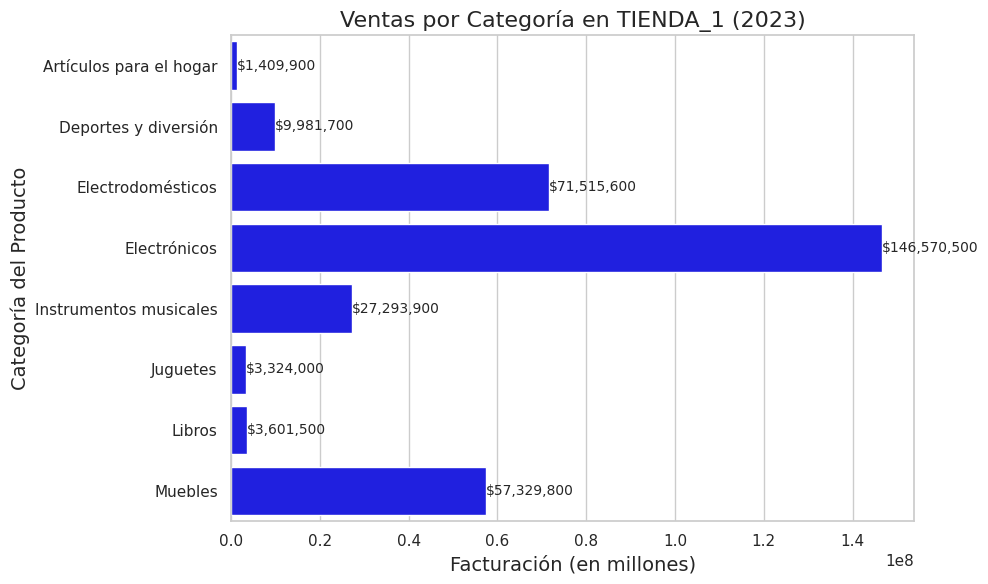

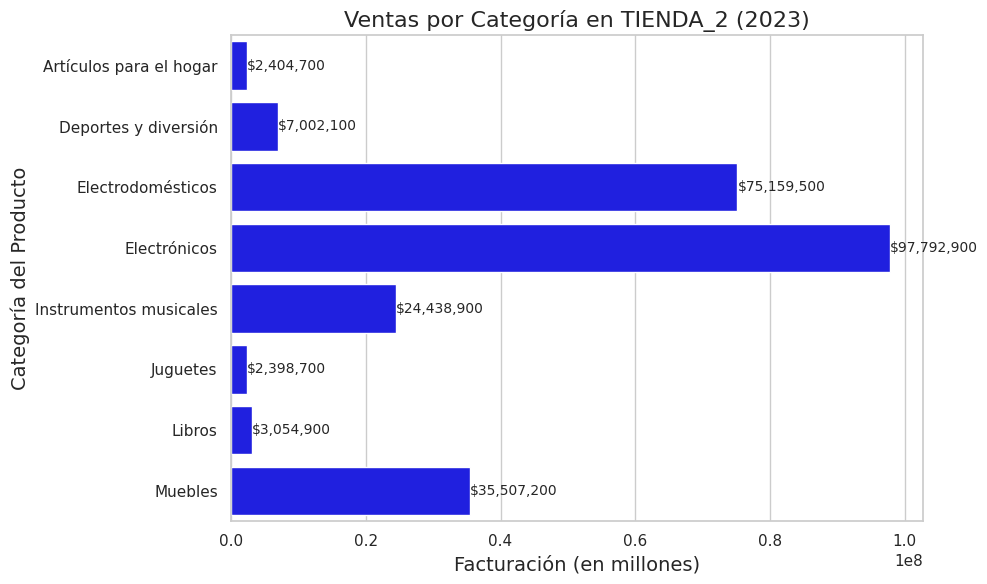

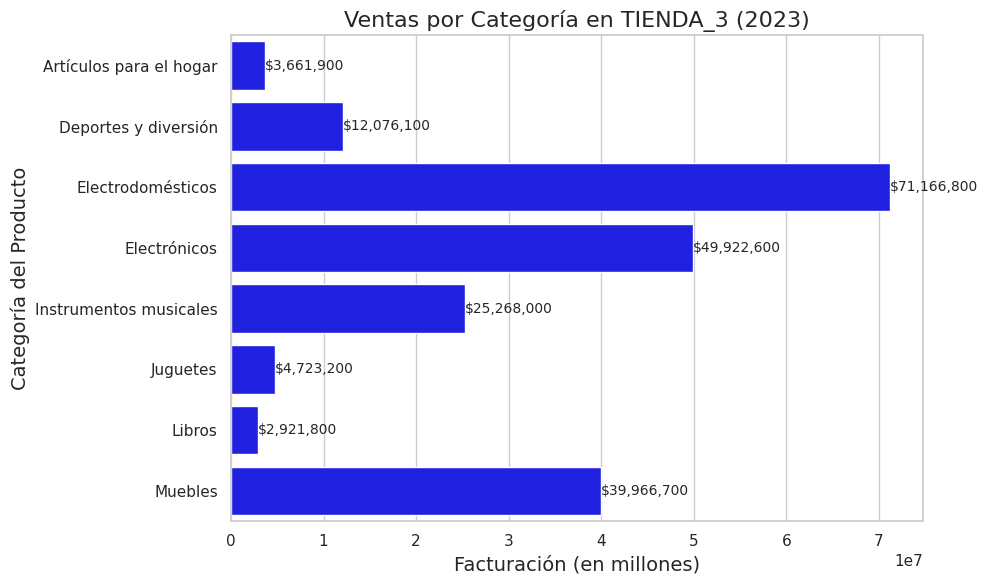

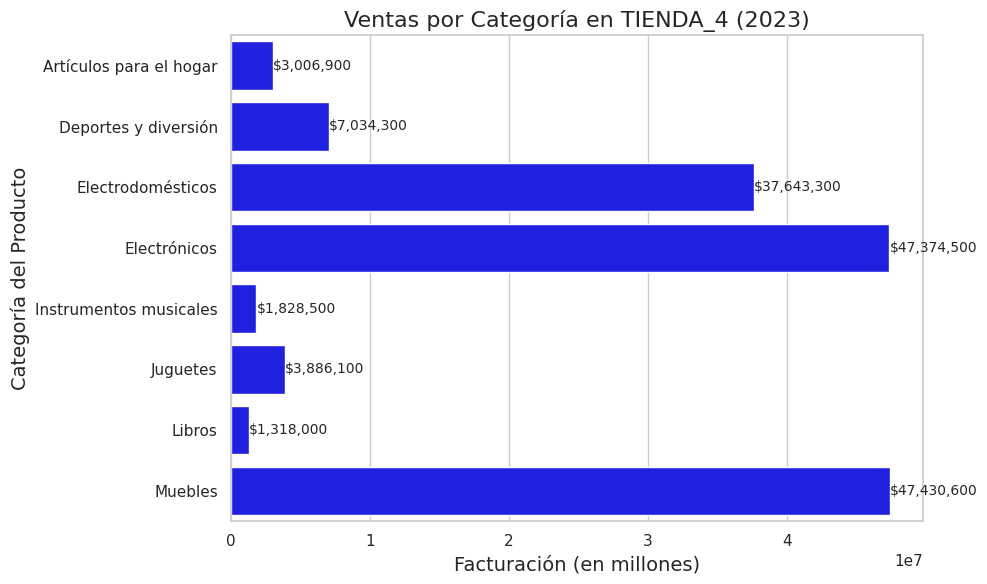

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Datos de ventas por categoría
datos_tiendas = {
    "TIENDA_1": {
        "Categoría del Producto": [
            "Artículos para el hogar", "Deportes y diversión", "Electrodomésticos",
            "Electrónicos", "Instrumentos musicales", "Juguetes",
            "Libros", "Muebles"
        ],
        "Facturación": [
            1409900, 9981700, 71515600, 146570500, 27293900, 3324000, 3601500, 57329800
        ]
    },
    "TIENDA_2": {
        "Categoría del Producto": [
            "Artículos para el hogar", "Deportes y diversión", "Electrodomésticos",
            "Electrónicos", "Instrumentos musicales", "Juguetes",
            "Libros", "Muebles"
        ],
        "Facturación": [
            2404700, 7002100, 75159500, 97792900, 24438900, 2398700, 3054900, 35507200
        ]
    },
    "TIENDA_3": {
        "Categoría del Producto": [
            "Artículos para el hogar", "Deportes y diversión", "Electrodomésticos",
            "Electrónicos", "Instrumentos musicales", "Juguetes",
            "Libros", "Muebles"
        ],
        "Facturación": [
            3661900, 12076100, 71166800, 49922600, 25268000, 4723200, 2921800, 39966700
        ]
    },
    "TIENDA_4": {
        "Categoría del Producto": [
            "Artículos para el hogar", "Deportes y diversión", "Electrodomésticos",
            "Electrónicos", "Instrumentos musicales", "Juguetes",
            "Libros", "Muebles"
        ],
        "Facturación": [
            3006900, 7034300, 37643300, 47374500, 1828500, 3886100, 1318000, 47430600
        ]
    }
}

# Crear gráficos de barras para cada tienda
for tienda, datos in datos_tiendas.items():
    categorias = datos["Categoría del Producto"]
    facturacion = datos["Facturación"]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=facturacion, y=categorias, color="blue")  # Usar color en lugar de palette
    plt.title(f"Ventas por Categoría en {tienda} (2023)", fontsize=16)
    plt.xlabel("Facturación (en millones)", fontsize=14)
    plt.ylabel("Categoría del Producto", fontsize=14)

    # Mostrar valores sobre las barras
    for i, valor in enumerate(facturacion):
        plt.text(valor, i, f"${valor:,}", va='center', ha='left', fontsize=10)

    plt.tight_layout()
    plt.show()


# 3. Calificación promedio de la tienda


In [31]:
import pandas as pd

# Cargar los archivos CSV desde las URLs
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Leer los archivos CSV
tienda_1 = pd.read_csv(url1)
tienda_2 = pd.read_csv(url2)
tienda_3 = pd.read_csv(url3)
tienda_4 = pd.read_csv(url4)

# Crear un diccionario con los DataFrames de cada tienda
tiendas = {
    "TIENDA_1": tienda_1,
    "TIENDA_2": tienda_2,
    "TIENDA_3": tienda_3,
    "TIENDA_4": tienda_4
}

# Filtrar registros de 2023 y calcular la calificación promedio para cada tienda
for tienda, df in tiendas.items():
    # Convertir la columna 'Fecha de Compra' a formato datetime, especificando el formato correcto
    df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], format='%d/%m/%Y', errors='coerce', dayfirst=True)

    # Filtrar los registros de 2023
    registros_2023 = df[df['Fecha de Compra'].dt.year == 2023]

    # Calcular la calificación promedio
    calificacion_promedio = registros_2023['Calificación'].mean()

    # Imprimir el resultado
    print(f"--- {tienda} (2023) ---")
    print(f"Calificación promedio en 2023: {calificacion_promedio:.2f}\n")


--- TIENDA_1 (2023) ---
Calificación promedio en 2023: 3.96

--- TIENDA_2 (2023) ---
Calificación promedio en 2023: 3.96

--- TIENDA_3 (2023) ---
Calificación promedio en 2023: 4.08

--- TIENDA_4 (2023) ---
Calificación promedio en 2023: 4.17



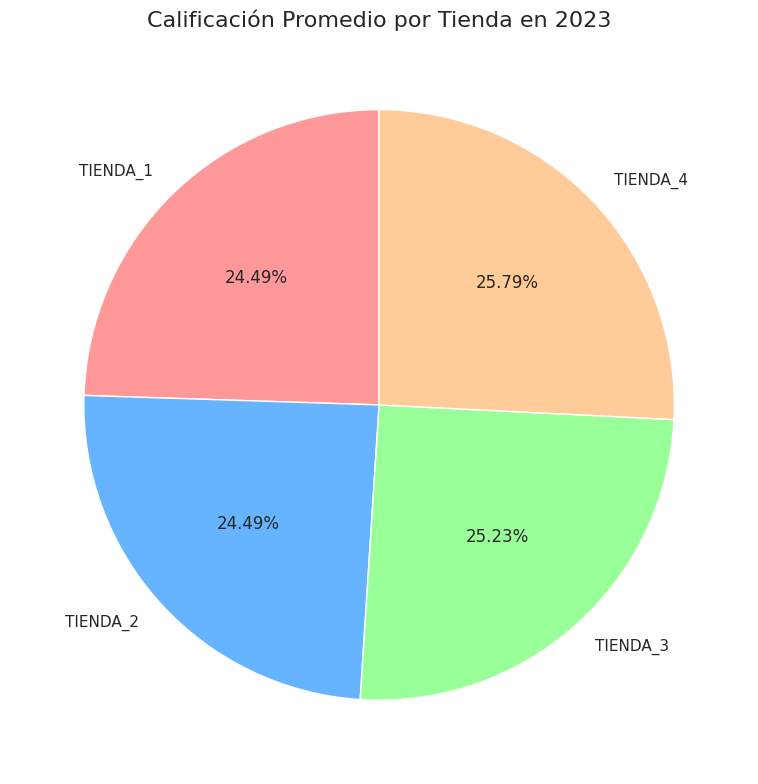

In [45]:
import matplotlib.pyplot as plt

# Datos de calificación promedio
tiendas = ['TIENDA_1', 'TIENDA_2', 'TIENDA_3', 'TIENDA_4']
calificaciones = [3.96, 3.96, 4.08, 4.17]

# Colores para el gráfico
colores = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(calificaciones, labels=tiendas, autopct='%1.2f%%', startangle=90, colors=colores)

# Agregar título
plt.title('Calificación Promedio por Tienda en 2023', fontsize=16)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

In [34]:
import pandas as pd

# URLs de los archivos CSV
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargar los datos desde las URLs
tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Agrupar los datos de las tiendas
tiendas = {
    "TIENDA_1": tienda,
    "TIENDA_2": tienda2,
    "TIENDA_3": tienda3,
    "TIENDA_4": tienda4
}

# Filtrar los registros de 2023
for tienda, df in tiendas.items():
    # Convertir la columna 'Fecha de Compra' a formato datetime
    df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], format='%d/%m/%Y', errors='coerce')

    # Filtrar los registros de 2023
    df_2023 = df[df['Fecha de Compra'].dt.year == 2023]

    # Obtener los productos más vendidos
    productos_mas_vendidos = df_2023['Producto'].value_counts().head(5)
    # Obtener los productos menos vendidos
    productos_menos_vendidos = df_2023['Producto'].value_counts().tail(5)

    # Mostrar los resultados
    print(f"\n--- {tienda} (2023) ---")
    print("Top 5 productos más vendidos:")
    print(productos_mas_vendidos)

    print("\nTop 5 productos menos vendidos:")
    print(productos_menos_vendidos)



--- TIENDA_1 (2023) ---
Top 5 productos más vendidos:
Producto
Armario                        9
Ciencia de datos con Python    8
Kit de bancas                  7
Lavadora de ropa               7
Ajedrez de madera              7
Name: count, dtype: int64

Top 5 productos menos vendidos:
Producto
Mochila            2
Cama box           2
Juego de mesa      2
Mesa de comedor    1
Dinosaurio Rex     1
Name: count, dtype: int64

--- TIENDA_2 (2023) ---
Top 5 productos más vendidos:
Producto
Estufa                 8
Tablet ABXY            7
Modelado predictivo    6
Sofá reclinable        6
Iphone 15              6
Name: count, dtype: int64

Top 5 productos menos vendidos:
Producto
Cama king                    2
Dinosaurio Rex               1
Auriculares                  1
Refrigerador                 1
Auriculares con micrófono    1
Name: count, dtype: int64

--- TIENDA_3 (2023) ---
Top 5 productos más vendidos:
Producto
Modelado predictivo    8
Auriculares            8
Set de ollas        

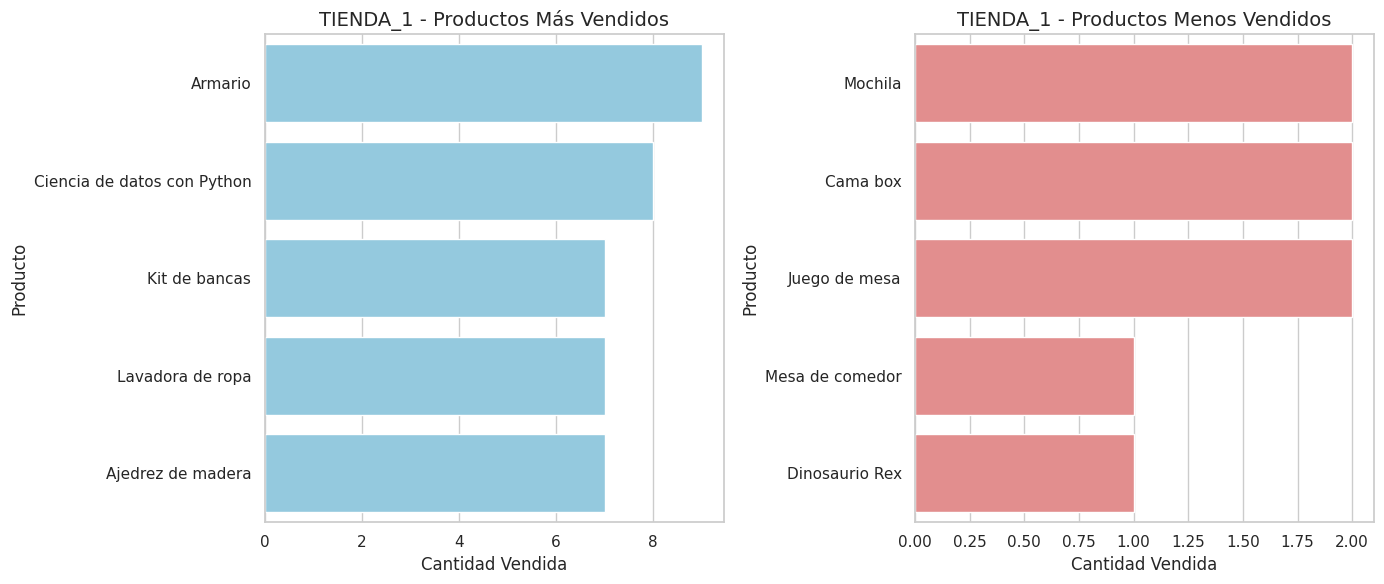

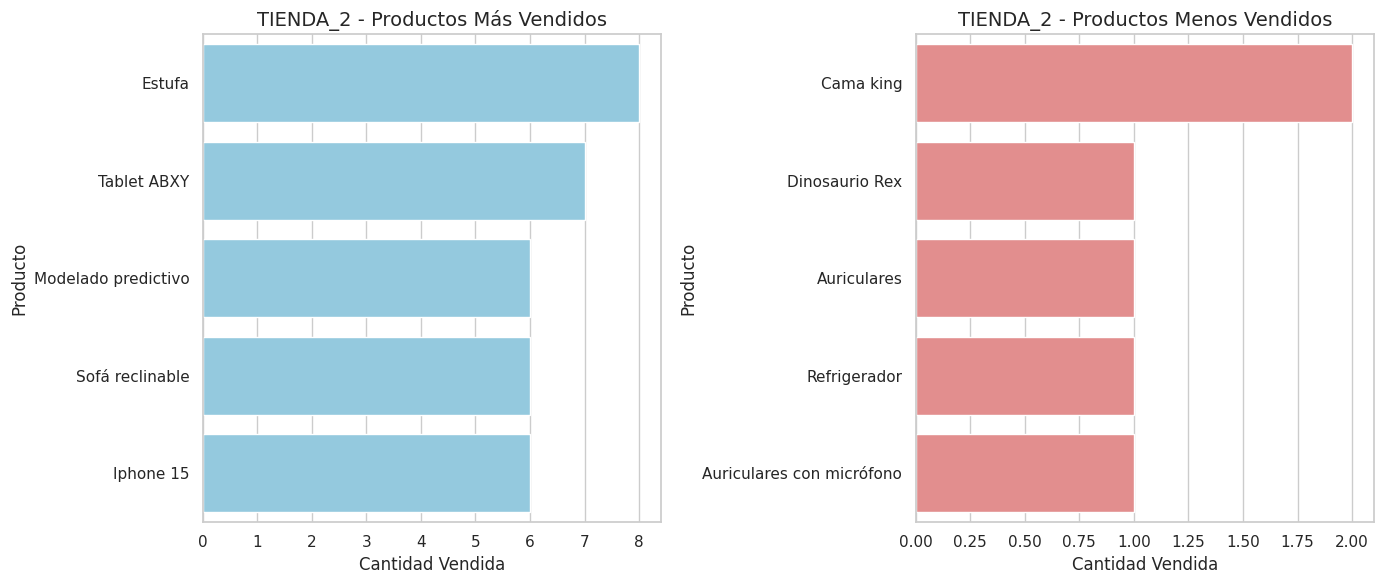

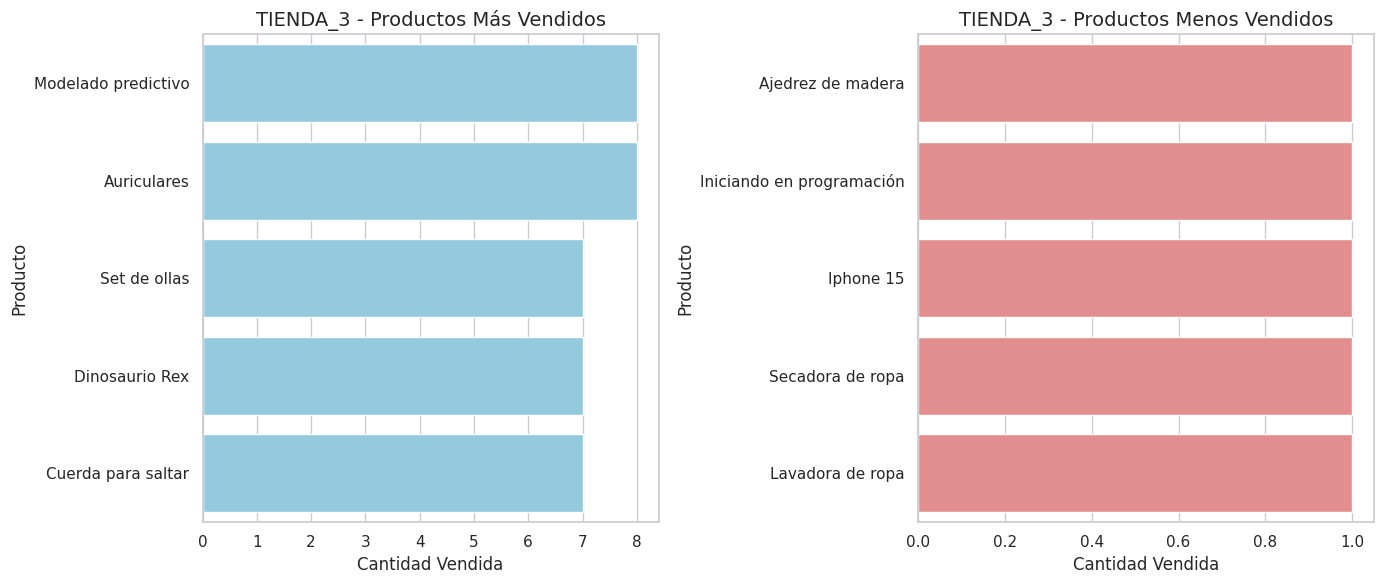

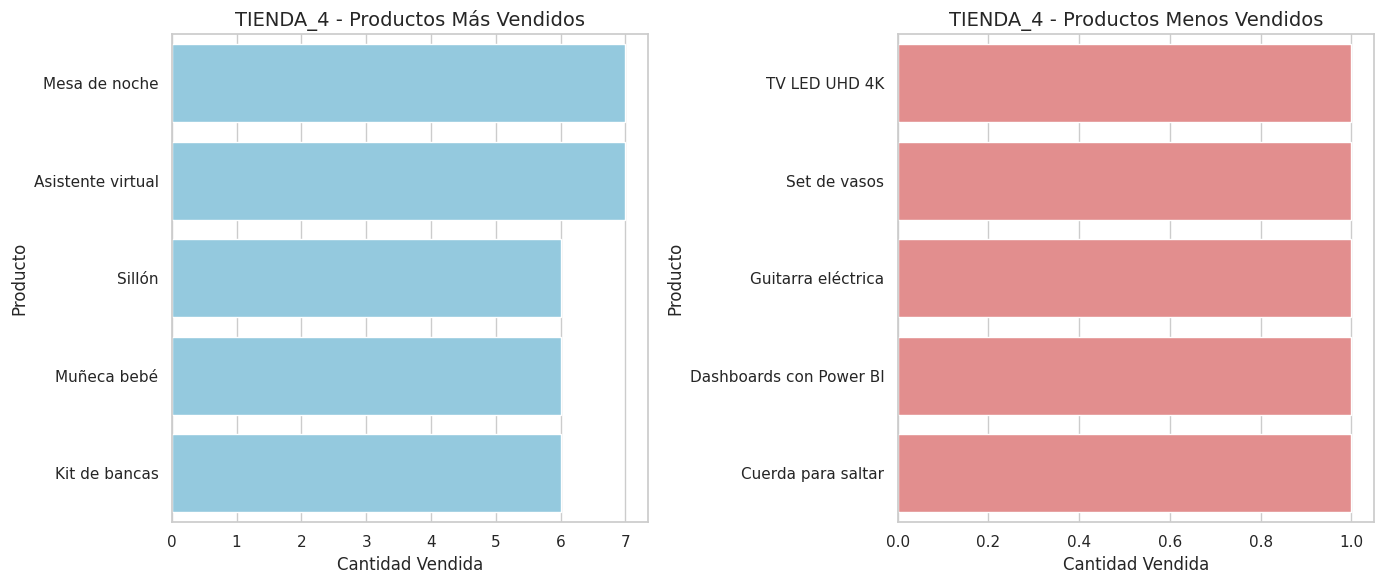

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Datos para cada tienda
tiendas = {
    "TIENDA_1": {
        "más_vendidos": {"Armario": 9, "Ciencia de datos con Python": 8, "Kit de bancas": 7, "Lavadora de ropa": 7, "Ajedrez de madera": 7},
        "menos_vendidos": {"Mochila": 2, "Cama box": 2, "Juego de mesa": 2, "Mesa de comedor": 1, "Dinosaurio Rex": 1},
    },
    "TIENDA_2": {
        "más_vendidos": {"Estufa": 8, "Tablet ABXY": 7, "Modelado predictivo": 6, "Sofá reclinable": 6, "Iphone 15": 6},
        "menos_vendidos": {"Cama king": 2, "Dinosaurio Rex": 1, "Auriculares": 1, "Refrigerador": 1, "Auriculares con micrófono": 1},
    },
    "TIENDA_3": {
        "más_vendidos": {"Modelado predictivo": 8, "Auriculares": 8, "Set de ollas": 7, "Dinosaurio Rex": 7, "Cuerda para saltar": 7},
        "menos_vendidos": {"Ajedrez de madera": 1, "Iniciando en programación": 1, "Iphone 15": 1, "Secadora de ropa": 1, "Lavadora de ropa": 1},
    },
    "TIENDA_4": {
        "más_vendidos": {"Mesa de noche": 7, "Asistente virtual": 7, "Sillón": 6, "Muñeca bebé": 6, "Kit de bancas": 6},
        "menos_vendidos": {"TV LED UHD 4K": 1, "Set de vasos": 1, "Guitarra eléctrica": 1, "Dashboards con Power BI": 1, "Cuerda para saltar": 1},
    },
}

# Función para graficar más y menos vendidos de una tienda
def graficar_tienda(tienda, datos):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [1, 1]})

    # Más vendidos
    productos_mas = list(datos["más_vendidos"].keys())
    ventas_mas = list(datos["más_vendidos"].values())
    sns.barplot(x=ventas_mas, y=productos_mas, ax=axes[0], color='skyblue')  # Color personalizado
    axes[0].set_title(f"{tienda} - Productos Más Vendidos", fontsize=14)
    axes[0].set_xlabel("Cantidad Vendida", fontsize=12)
    axes[0].set_ylabel("Producto", fontsize=12)

    # Menos vendidos
    productos_menos = list(datos["menos_vendidos"].keys())
    ventas_menos = list(datos["menos_vendidos"].values())
    sns.barplot(x=ventas_menos, y=productos_menos, ax=axes[1], color='lightcoral')  # Color personalizado
    axes[1].set_title(f"{tienda} - Productos Menos Vendidos", fontsize=14)
    axes[1].set_xlabel("Cantidad Vendida", fontsize=12)
    axes[1].set_ylabel("Producto", fontsize=12)

    plt.tight_layout()
    plt.show()

# Generar gráficos para cada tienda
for tienda, datos in tiendas.items():
    graficar_tienda(tienda, datos)


# 5. Envío promedio por tienda

In [40]:
import pandas as pd

# URLs de los archivos CSV
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargar los datos desde las URLs
tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Lista de DataFrames y nombres de tiendas
tiendas = {"TIENDA_1": tienda1, "TIENDA_2": tienda2, "TIENDA_3": tienda3, "TIENDA_4": tienda4}

# Procesar cada tienda
for tienda, df in tiendas.items():
    # Convertir la columna 'Fecha de Compra' a formato datetime
    df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], format='%d/%m/%Y', errors='coerce')

    # Filtrar los registros de 2023
    df_2023 = df[df['Fecha de Compra'].dt.year == 2023]

    # Calcular el costo promedio de envío
    promedio_envio = df_2023['Costo de envío'].mean()

    print(f"--- {tienda} (2023) ---")
    if not df_2023.empty:
        print(f"Costo promedio de envío en 2023: {promedio_envio:.2f}")
    else:
        print("No hay datos para el año 2023.")


--- TIENDA_1 (2023) ---
Costo promedio de envío en 2023: 28904.69
--- TIENDA_2 (2023) ---
Costo promedio de envío en 2023: 23981.25
--- TIENDA_3 (2023) ---
Costo promedio de envío en 2023: 18739.33
--- TIENDA_4 (2023) ---
Costo promedio de envío en 2023: 19326.11


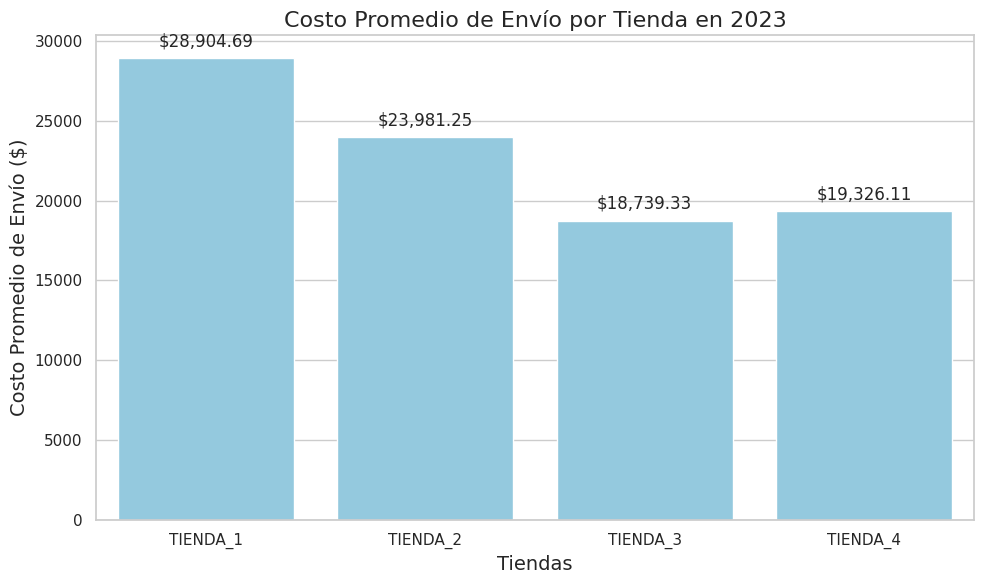

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Datos de costo promedio de envío
tiendas = ['TIENDA_1', 'TIENDA_2', 'TIENDA_3', 'TIENDA_4']
costo_envio = [28904.69, 23981.25, 18739.33, 19326.11]

# Configurar el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=tiendas, y=costo_envio, color='skyblue')

# Agregar etiquetas y título
plt.title('Costo Promedio de Envío por Tienda en 2023', fontsize=16)
plt.xlabel('Tiendas', fontsize=14)
plt.ylabel('Costo Promedio de Envío ($)', fontsize=14)

# Mostrar valores encima de las barras
for i, valor in enumerate(costo_envio):
    plt.text(i, valor + 500, f"${valor:,.2f}", ha='center', va='bottom', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


**Introducción**

El objetivo de este análisis es determinar cuál de las cuatro tiendas del Sr. Juan presenta el peor rendimiento en 2023. Para ello, se evaluarán diversos factores clave que afectan la eficiencia de cada tienda, tales como los ingresos totales, las categorías de productos más y menos vendidas, las calificaciones promedio de los clientes, los productos más y menos vendidos, y el coste de envío promedio. A partir de estos factores, se identificará la tienda con el menor rendimiento, con la finalidad de que el Sr. Juan considere venderla y optimizar su negocio.

**Análisis de Datos**

**Ingresos Totales de las Tiendas**

**Los ingresos totales de cada tienda son los siguientes:**

TIENDA_1: $321,026,900.00

TIENDA_2: $247,758,900.00

TIENDA_3: $209,707,100.00

TIENDA_4: $149,522,200.00

**Observación:**
La TIENDA_1 tiene los ingresos más altos, mientras que la TIENDA_4 tiene los más bajos, lo que podría indicar que la TIENDA_4 está teniendo más dificultades en generar ventas en comparación con las otras.

**Facturación por Categoría de Producto**

Aquí se observa que las categorías de productos más vendidas en cada tienda son predominantemente Electrodomésticos y Electrónicos, lo cual es un buen indicador de que estas tiendas están bien posicionadas en estos segmentos. A continuación se presentan las categorías y su facturación en cada tienda:

TIENDA_1: Electrodomésticos (71,515,600), Electrónicos (146,570,500)

TIENDA_2: Electrodomésticos (75,159,500), Electrónicos (97,792,900)

TIENDA_3: Electrodomésticos (71,166,800), Electrónicos (49,922,600)

TIENDA_4: Electrodomésticos (37,643,300), Electrónicos (47,374,500)

**Observación:**
La TIENDA_1 y la TIENDA_2 destacan en facturación de productos electrónicos, mientras que la TIENDA_4 tiene una menor facturación en esta categoría. Esto sugiere que la TIENDA_4 podría no estar capitalizando tanto en productos electrónicos, lo cual podría ser una debilidad.

**Calificación Promedio de Clientes**

**Las calificaciones promedio en 2023 para cada tienda son:**

TIENDA_1: 3.96

TIENDA_2: 3.96

TIENDA_3: 4.08

TIENDA_4: 4.17

**Observación:** La TIENDA_4 tiene la calificación más alta, lo que sugiere que los clientes están más satisfechos con su servicio o productos. Esto es una ventaja significativa, ya que una mayor satisfacción del cliente suele correlacionarse con la fidelización y el crecimiento sostenido a largo plazo.

**Productos Más y Menos Vendidos**

A continuación, se presentan los productos más vendidos y menos vendidos en cada tienda:

TIENDA_1: Los productos más vendidos son Armario (9 unidades) y Ciencia de datos con Python (8 unidades). Los menos vendidos son Mesa de comedor (1 unidad) y Dinosaurio Rex (1 unidad).

TIENDA_2: Los productos más vendidos son Estufa (8 unidades) y Tablet ABXY (7 unidades). Los menos vendidos son Cama king (2 unidades) y Dinosaurio Rex (1 unidad).

TIENDA_3: Los productos más vendidos son Modelado predictivo (8 unidades) y Auriculares (8 unidades). Los menos vendidos son Ajedrez de madera (1 unidad) y Lavadora de ropa (1 unidad).

TIENDA_4: Los productos más vendidos son Mesa de noche (7 unidades) y Asistente virtual (7 unidades). Los menos vendidos son TV LED UHD 4K (1 unidad) y Guitarra eléctrica (1 unidad).

**Observación:**
La TIENDA_4 presenta productos como TV LED UHD 4K y Guitarra eléctrica entre los menos vendidos, lo que podría indicar que tiene productos de nicho que no están teniendo una alta demanda.

**Costo Promedio de Envío**

**El costo promedio de envío para cada tienda es:**

TIENDA_1: $28,904.69

TIENDA_2: $23,981.25

TIENDA_3: $18,739.33

TIENDA_4: $19,326.11

**Observación:**
La TIENDA_1 tiene el costo de envío más alto, lo que podría indicar una operación logística más costosa o una mayor cantidad de productos voluminosos o pesados. Esto es una desventaja, ya que los costos de envío elevados afectan los márgenes de ganancia.

**Conclusiones y Recomendación**

Basándonos en los datos y análisis realizados, la TIENDA_4 parece ser la opción menos eficiente. A pesar de tener una calificación promedio más alta (4.17), lo que indica una mayor satisfacción del cliente, la tienda presenta los siguientes problemas:

Bajos Ingresos Totales: La facturación total de la TIENDA_4 es la más baja de todas las tiendas, con una diferencia significativa respecto a las demás tiendas. Esto sugiere que la tienda no está generando suficientes ventas en comparación con su competencia.

Facturación en Categorías Clave: La TIENDA_4 tiene una baja facturación en categorías clave como productos electrónicos, que son altamente demandados, lo que podría ser un indicativo de que no está aprovechando bien estas oportunidades de venta.

Productos Menos Vendidos: Algunos productos de la TIENDA_4, como el TV LED UHD 4K y la Guitarra eléctrica, tienen un bajo volumen de ventas, lo que podría ser un reflejo de que los productos que ofrece no están siendo bien recibidos por los clientes o que no se están promocionando adecuadamente.

Costo de Envío Relativamente Alto: Aunque no es el más alto, el costo de envío de la TIENDA_4 aún es considerable y podría estar afectando sus márgenes de ganancia.

Por lo tanto, se recomienda que el Sr. Juan considere vender la TIENDA_4, ya que es la que menos rendimiento tiene en comparación con las otras, especialmente en términos de facturación, ventas de productos clave y rentabilidad.